In [546]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
blue = sns.color_palette('Blues')[-2]
color = sns.color_palette() 
sns.set_style('darkgrid') 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [547]:
train = pd.read_csv('Train_EDA.csv')
test=pd.read_csv('Test_EDA.csv')
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))
train.head()

all_data size is : (2412, 82)


,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BoxCoxPrice,BsmtCond,BsmtExposure,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,0,864,0,0,None,3,1Fam,7.749,TA,No,...,WD,0,Pave,6,864.000,AllPub,0,1978,2005,2009
1,1,1368,0,0,None,3,1Fam,7.697,TA,Mn,...,WD,0,Pave,6,1078.000,AllPub,0,1950,1950,2009
2,2,1113,858,0,None,3,1Fam,7.991,TA,Mn,...,WD,0,Pave,8,1113.000,AllPub,0,2005,2005,2009
3,3,684,720,0,Pave,3,Twnhs,7.836,TA,No,...,WD,0,Pave,5,672.000,AllPub,20,1999,2000,2008
4,4,815,875,0,None,3,1Fam,7.770,TA,No,...,ConLw,0,Pave,7,815.000,AllPub,0,1916,1950,2006


In [548]:
train_missing = pd.read_csv('train.csv')
test_missing = pd.read_csv('test.csv') 
all_data1 = pd.concat((train_missing, test_missing)).reset_index(drop=True)
all_data1.drop(['SalePrice'], axis=1, inplace=True)
all_data1.drop(['Id'], axis=1, inplace=True)
print("all_data1 size is : {}".format(all_data1.shape))

all_data1 size is : (2412, 78)


# Target Variable

In [549]:
prices=['SalePrice','LogPrice','BoxCoxPrice']
table1_1=train[prices].describe().round(5)
table1_1.loc['Skew', :]=train[prices].skew() 
table1_1.loc['Kurt', :]=train[prices].kurt() 
table1_1.round(5)

,SalePrice,LogPrice,BoxCoxPrice
count,804.000,804.000,804.000
mean,175324.466,12.004,7.819
std,70035.485,0.371,0.146
min,35000.000,10.463,7.174
25%,129500.000,11.771,7.728
50%,158725.000,11.975,7.809
75%,206225.000,12.237,7.912
max,615000.000,13.329,8.319
Skew,1.581,0.109,-0.007
Kurt,4.277,0.697,0.773


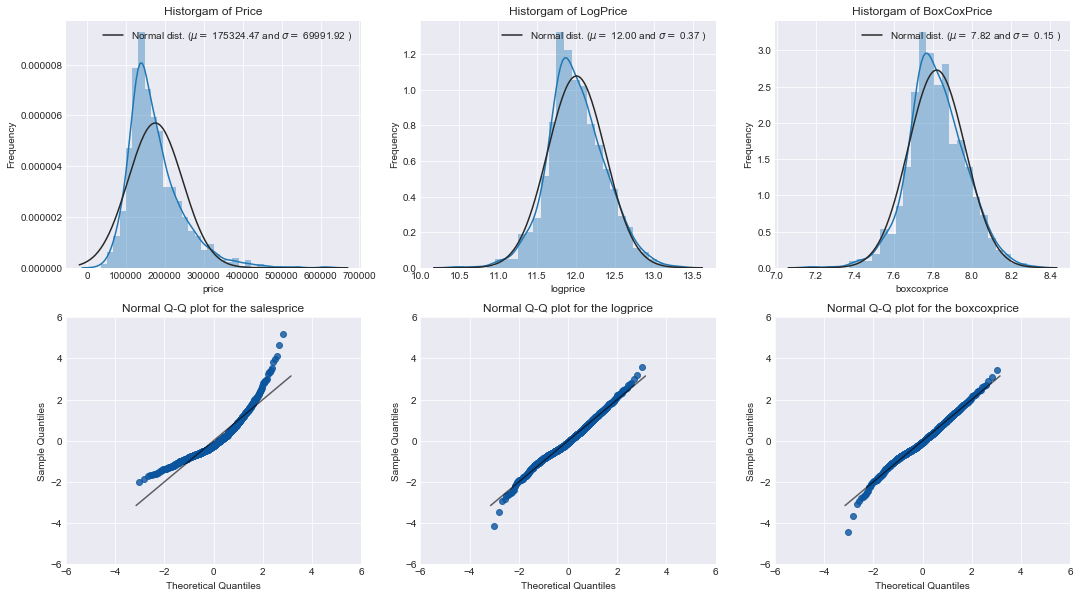

In [550]:

fig, ax= plt.subplots(2,3, figsize=(18,10))
sns.distplot(train['SalePrice'] , fit=norm,ax=ax[0,0]);
(mu, sigma) = norm.fit(train['SalePrice'])
ax[0,0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax[0,0].set(title='Historgam of Price', xlabel='price',ylabel='Frequency')

pp = sm.ProbPlot(train['SalePrice'], fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,0])
a=ax[1,0].get_xlim()[0]
b=ax[1,0].get_xlim()[1]
ax[1,0].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,0].set_xlim(-6,6)
ax[1,0].set_ylim(-6,6)
ax[1,0].set_title('Normal Q-Q plot for the salesprice')

sns.distplot(train['LogPrice'] , fit=norm,ax=ax[0,1]);
(mu, sigma) = norm.fit(train['LogPrice'])
ax[0,1].set(title='Historgam of LogPrice', xlabel='logprice',ylabel='Frequency')
ax[0,1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
pp = sm.ProbPlot(train['LogPrice'], fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,1])
a=ax[1,1].get_xlim()[0]
b=ax[1,1].get_xlim()[1]
ax[1,1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,1].set_xlim(-6,6)
ax[1,1].set_ylim(-6,6)
ax[1,1].set_title('Normal Q-Q plot for the logprice')

sns.distplot(train['BoxCoxPrice'] , fit=norm,ax=ax[0,2]);
(mu, sigma) = norm.fit(train['BoxCoxPrice'])
ax[0,2].set(title='Historgam of BoxCoxPrice', xlabel='boxcoxprice',ylabel='Frequency')
ax[0,2].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
pp = sm.ProbPlot(train['BoxCoxPrice'], fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,2])
a=ax[1,2].get_xlim()[0]
b=ax[1,2].get_xlim()[1]
ax[1,2].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,2].set_xlim(-6,6)
ax[1,2].set_ylim(-6,6)
ax[1,2].set_title('Normal Q-Q plot for the boxcoxprice')

plt.show()

Saleprice:pronouncedly right skewed distribution. A substantial number of house cost less than 300000 dallar.

As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.

both logprice and boxcoxprice appear more normally distributed. and the standard error of boxcoxprice is smallest. 



# Missing data
## I use the original dataset given by marcel for this part, as i imputing missing values for cleaned dataset.

In [551]:
ntrain = train_missing.shape[0]
ntest = test_missing.shape[0]
y_train = train_missing.SalePrice.values


In [552]:
## note that all_data and all_data1 are different.

In [553]:
all_data_na = (all_data1.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(25)  # 21 varianles have missing value  

,Missing Ratio
PoolQC,99.627
MiscFeature,96.020
Alley,93.615
Fence,79.187
FireplaceQu,48.259
LotFrontage,18.698
GarageYrBlt,4.851
GarageQual,4.851
GarageFinish,4.851
GarageCond,4.851


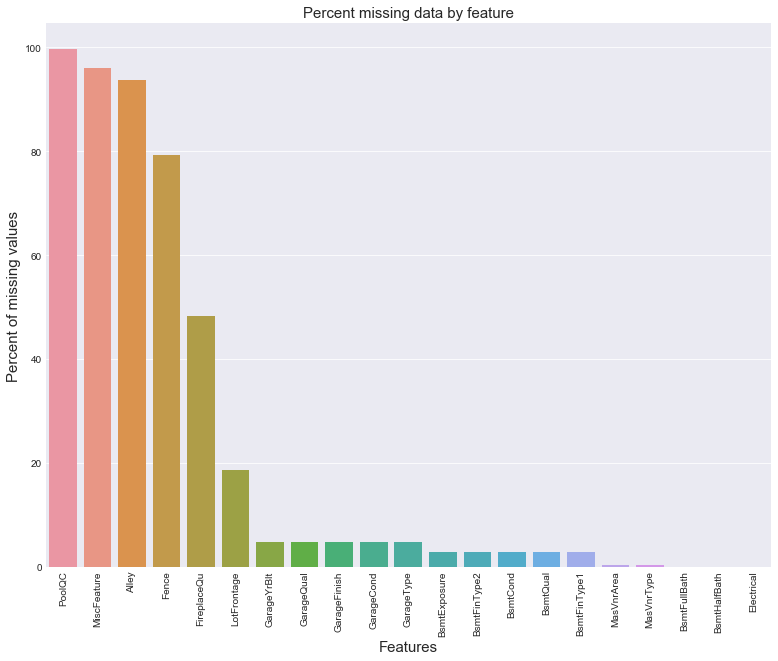

In [554]:
f, ax = plt.subplots(figsize=(13, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Skewed features

In [555]:
numeric_feats = all_data1.dtypes[all_data1.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data1[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,20.670
PoolArea,19.222
LotArea,13.400
LowQualFinSF,13.238
3SsnPorch,11.942
KitchenAbvGr,4.678
EnclosedPorch,4.093
ScreenPorch,3.998
BsmtFinSF2,3.921
BsmtHalfBath,3.727


In [556]:
# Differentiate numerical features (minus the target) and categorical features
numerical_features = train_missing.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
numerical_features =  numerical_features.drop("OverallCond")
numerical_features =  numerical_features.drop("YrSold")
numerical_features =  numerical_features.drop("MoSold")
numerical_features =  numerical_features.drop("MSSubClass")


# Corr analysis

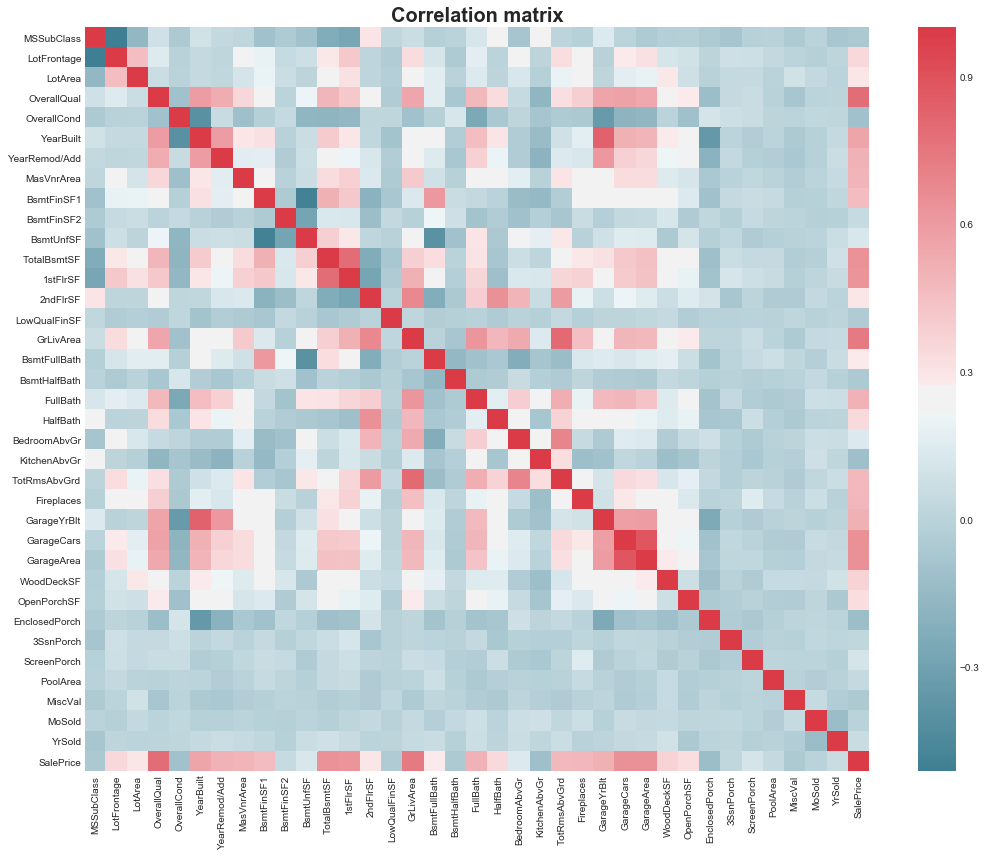

In [557]:

train_missing.corr().round(2)
fig, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_missing.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

the correlations only tell us about linear relationships. 

We should use exploratory plots to discover nonlinear patterns, and if nonlinear relationship is hard to adjust, nonparameter models should be used. 

if linear relationship could be easily built , linear regression (parameter model ）could be most powerful.

### based on this plot, MSSubClass and Lotfrontage highly negative corr. 
### 1stFlrSF ,2ndFlrSF and TotalBsmtSF are high corrleated, and TotalBsmtSF', '1stFlrSF' have more than 0.5 corr with Salesprice.

In [558]:
# Find most important features relative to target
train.drop(['LogPrice'], axis=1, inplace=True)  
train.drop(['BoxCoxPrice'], axis=1, inplace=True)
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(25))
## zoe: old train set.

Find most important features relative to target
SalePrice       1.000
OverallQual     0.790
GrLivArea       0.738
GarageArea      0.645
GarageCars      0.643
TotalBsmtSF     0.635
1stFlrSF        0.629
YearBuilt       0.561
FullBath        0.509
YearRemod/Add   0.505
MasVnrArea      0.493
Fireplaces      0.485
TotRmsAbvGrd    0.479
BsmtFinSF1      0.464
WoodDeckSF      0.373
HalfBath        0.341
OpenPorchSF     0.329
LotArea         0.293
2ndFlrSF        0.292
BsmtFullBath    0.277
GarageYrBlt     0.257
LotFrontage     0.145
BedroomAbvGr    0.142
BsmtUnfSF       0.123
ScreenPorch     0.105
Name: SalePrice, dtype: float64


In [559]:
correlation=train.corr()

high_corr=[]
print('corr >=0.5 :')
for i in numerical_features:
    if correlation['SalePrice'][i]>=0.5:
        high_corr.append(i) 
print(high_corr)
print("------------------------")
print("corr<=-0.5 :")
for i in numerical_features:
    if correlation['SalePrice'][i]<=-0.5:
        print(i)
    else: 
        print('no predictor')
        break

corr >=0.5 :
['OverallQual', 'YearBuilt', 'YearRemod/Add', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']
------------------------
corr<=-0.5 :
no predictor


### as TotalBsmtSF', '1stFlrSF'      ; 'GarageCars', 'GarageArea' are high corr with price and multicollinearlity could exist. i analysis these predictors first.

## TotalBsmtSF ,1stFlrSF and 2ndFlrSF
1st Flr SF (Continuous): First Floor square feet

2nd Flr SF (Continuous)	: Second floor square feet

otal Bsmt SF (Continuous): Total square feet of basement area 

In [560]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] 
Variables=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','TotalSF','SalePrice']
table1_2=train[Variables].corr() 
table1_2

,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotalSF,SalePrice
TotalBsmtSF,1.000,0.791,-0.239,0.803,0.635
1stFlrSF,0.791,1.000,-0.277,0.770,0.629
2ndFlrSF,-0.239,-0.277,1.000,0.308,0.292
TotalSF,0.803,0.770,0.308,1.000,0.828
SalePrice,0.635,0.629,0.292,0.828,1.000


###  i add a new predictor called TotalSF, and then  corr with saleprice is 0.828

In [561]:
train_missing['TotalSF'] = train_missing['TotalBsmtSF'] + train_missing['1stFlrSF'] +train_missing['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] +test['2ndFlrSF']
test_missing['TotalSF'] = test_missing['TotalBsmtSF'] + test_missing['1stFlrSF'] + test_missing['2ndFlrSF']

In [562]:
del train['TotalBsmtSF'] 
del train['1stFlrSF']
del train['2ndFlrSF']


del train_missing['TotalBsmtSF'] 
del train_missing['1stFlrSF']
del train_missing['2ndFlrSF']

del test['TotalBsmtSF'] 
del test['1stFlrSF']
del test['2ndFlrSF']

del test_missing['TotalBsmtSF'] 
del test_missing['1stFlrSF']
del test_missing['2ndFlrSF']

## GarageCars,GarageArea

Garage Cars (Discrete): Size of garage in car capacity

Garage Area (Continuous): Size of garage in square feet

### havenot adjust these two variables.  just show table below, corr is 0.88,, multicollinearity could exist

In [563]:
Variables=['GarageCars','GarageArea','SalePrice']
table1_3=train[Variables].corr() 
table1_3

,GarageCars,GarageArea,SalePrice
GarageCars,1.000,0.882,0.643
GarageArea,0.882,1.000,0.645
SalePrice,0.643,0.645,1.000


### try interaction fail . no interaction bet cars and area

In [564]:
y, lmbda=stats.boxcox(train['SalePrice'])
train['BoxCoxPrice']=((train['SalePrice']**lmbda - 1) / lmbda)
train['LogPrice']=np.log(train['SalePrice'])
prices=['SalePrice','LogPrice','BoxCoxPrice']

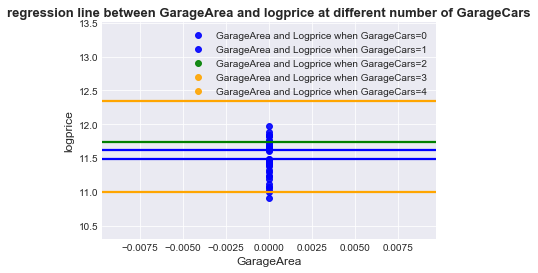

In [565]:
fig, ax= plt.subplots()

index=train['GarageCars']==0
sns.regplot(train.loc[index, 'GarageArea'], train.loc[index, 'LogPrice'], label='GarageArea and Logprice when GarageCars=0',
             ci=None, color='blue', scatter_kws={'s': 35, 'alpha': 0.9})

index=train['GarageCars']==1
sns.regplot(train.loc[index, 'GarageArea'], train.loc[index, 'LogPrice'], label='GarageArea and Logprice when GarageCars=1',
             ci=None, color='blue', scatter_kws={'s': 35, 'alpha': 0.9})

index=train['GarageCars']==2
sns.regplot(train.loc[index, 'GarageArea'], train.loc[index, 'LogPrice'], label='GarageArea and Logprice when GarageCars=2',
             ci=None, color='green', scatter_kws={'s': 35, 'alpha': 0.9})

index=train['GarageCars']==3
sns.regplot(train.loc[index, 'GarageArea'], train.loc[index, 'LogPrice'], label='GarageArea and Logprice when GarageCars=3',
             ci=None, color='orange',scatter_kws={'s': 35,'alpha': 0.9})

index=train['GarageCars']==4
sns.regplot(train.loc[index, 'GarageArea'], train.loc[index, 'LogPrice'], label='GarageArea and Logprice when GarageCars=4',
             ci=None, color='orange',scatter_kws={'s': 35,'alpha': 0.9})



ax.set_xlabel('GarageArea',  {'fontsize': 12})
ax.set_ylabel('logprice', {'fontsize': 12})
ax.set_title('regression line between GarageArea and logprice at different number of GarageCars', fontweight='bold', fontsize=13)
plt.legend(loc='best')

sns.despine()
plt.show()

# Top 5 most important predictor analysis.

In [566]:

numerical_features = train_missing.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
numerical_features =  numerical_features.drop("OverallCond")
numerical_features =  numerical_features.drop("YrSold")
numerical_features =  numerical_features.drop("MoSold")
numerical_features =  numerical_features.drop("MSSubClass")


correlation=train.corr()

print(len(correlation['SalePrice'])) 

high_corr=[]
print('corr >=0.6 :')
for i in numerical_features:
    if correlation['SalePrice'][i]>=0.6:
        high_corr.append(i) 
print(high_corr)

38
corr >=0.6 :
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalSF']


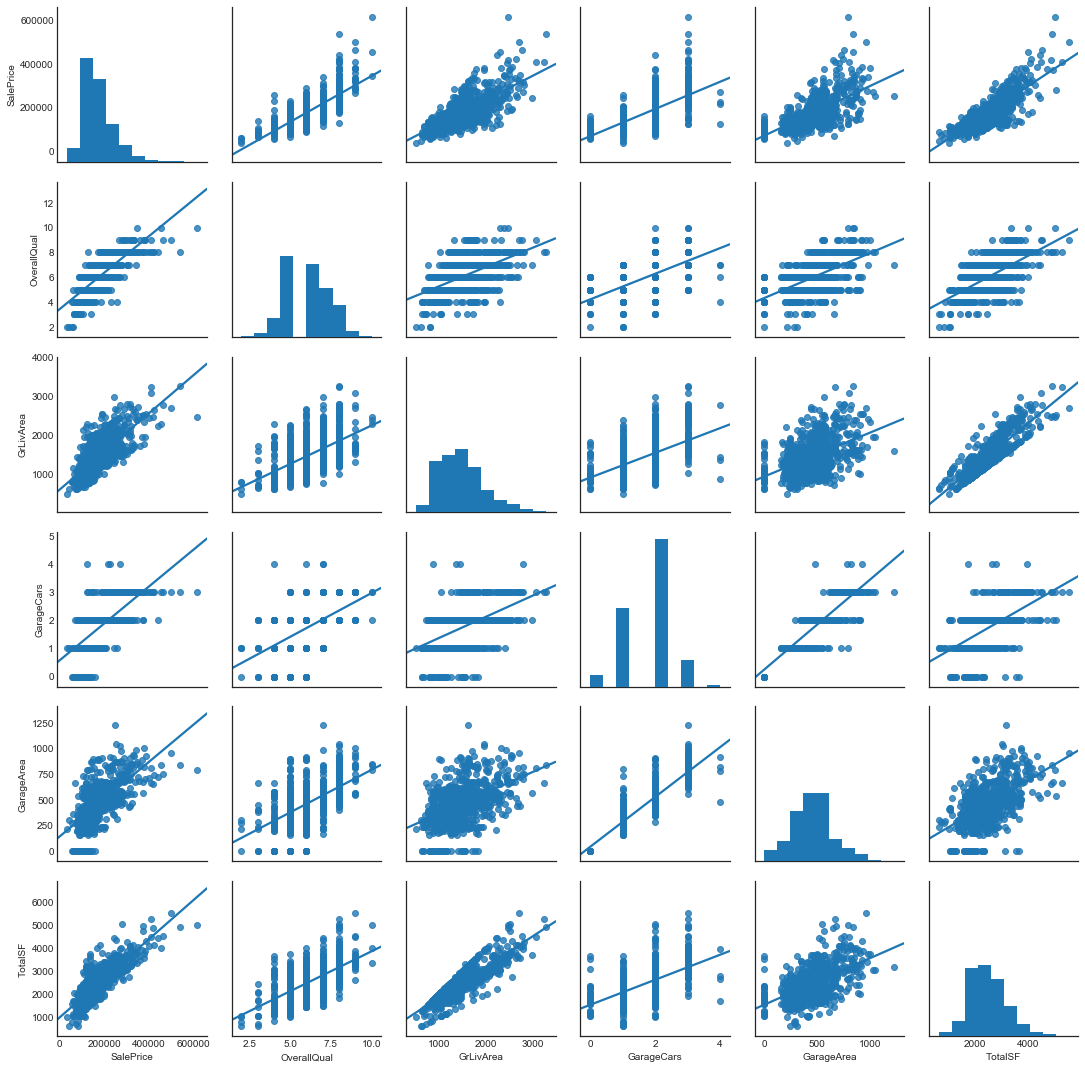

In [567]:
response=['SalePrice'] 

predictors=high_corr
with sns.axes_style('white'):
    sns.pairplot(train_missing[response+predictors],kind='reg',plot_kws={'ci':None})
plt.show()

## OverallQual VS SalePrice

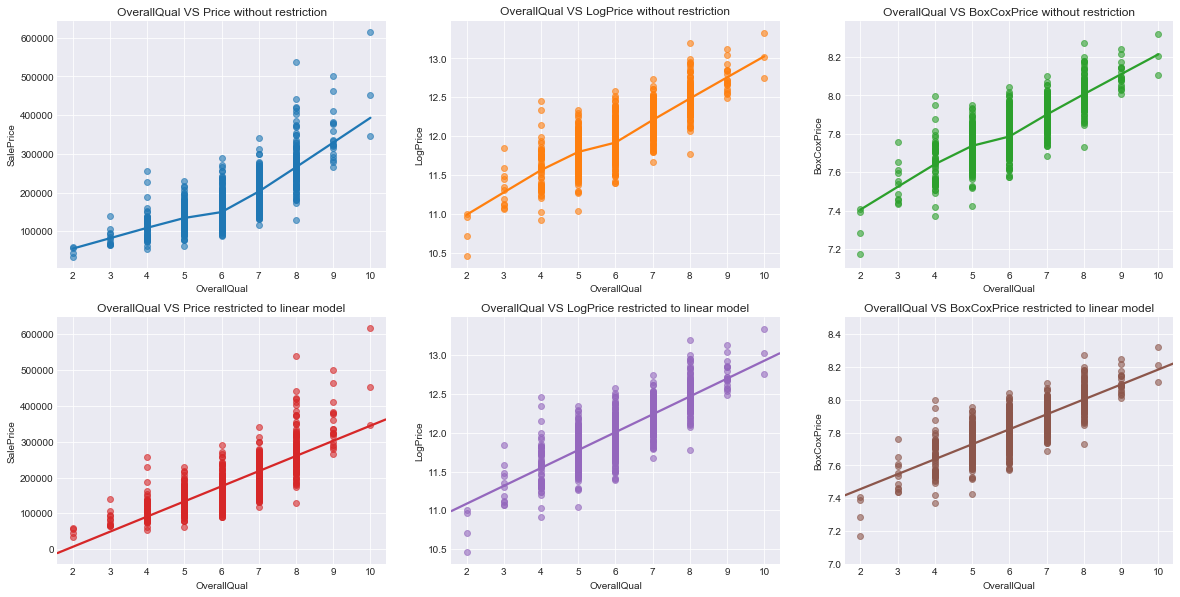

In [568]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['OverallQual'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='OverallQual VS Price without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='OverallQual VS LogPrice without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='OverallQual VS BoxCoxPrice without restriction',xlabel='OverallQual')


sns.regplot(train['OverallQual'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='OverallQual VS Price restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='OverallQual VS LogPrice restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='OverallQual VS BoxCoxPrice restricted to linear model',xlabel='OverallQual')
ax[1,2].set_ylim(7,8.5)

plt.show()

In [569]:
train["OverallQual-s2"] = train["OverallQual"] ** 2

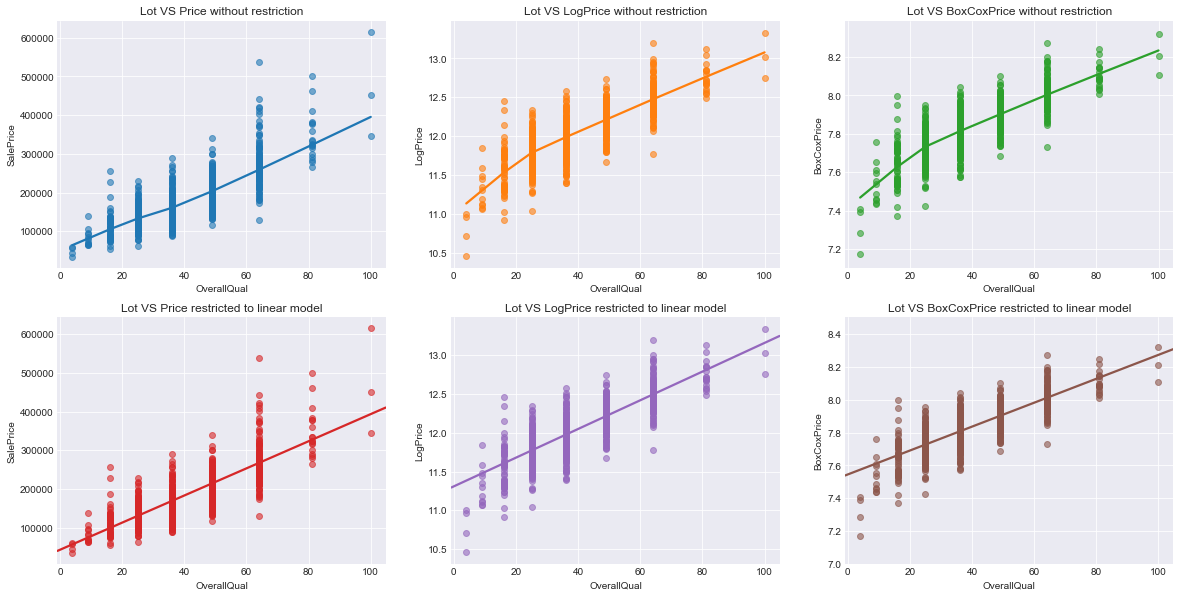

In [570]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['OverallQual-s2'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='Lot VS Price without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual-s2'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='Lot VS LogPrice without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual-s2'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='Lot VS BoxCoxPrice without restriction',xlabel='OverallQual')


sns.regplot(train['OverallQual-s2'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='Lot VS Price restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual-s2'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='Lot VS LogPrice restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual-s2'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='Lot VS BoxCoxPrice restricted to linear model',xlabel='OverallQual')
ax[1,2].set_ylim(7,8.5)

plt.show()

### "OverallQual" ** 2 can be linear relationship with price

In [571]:
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])

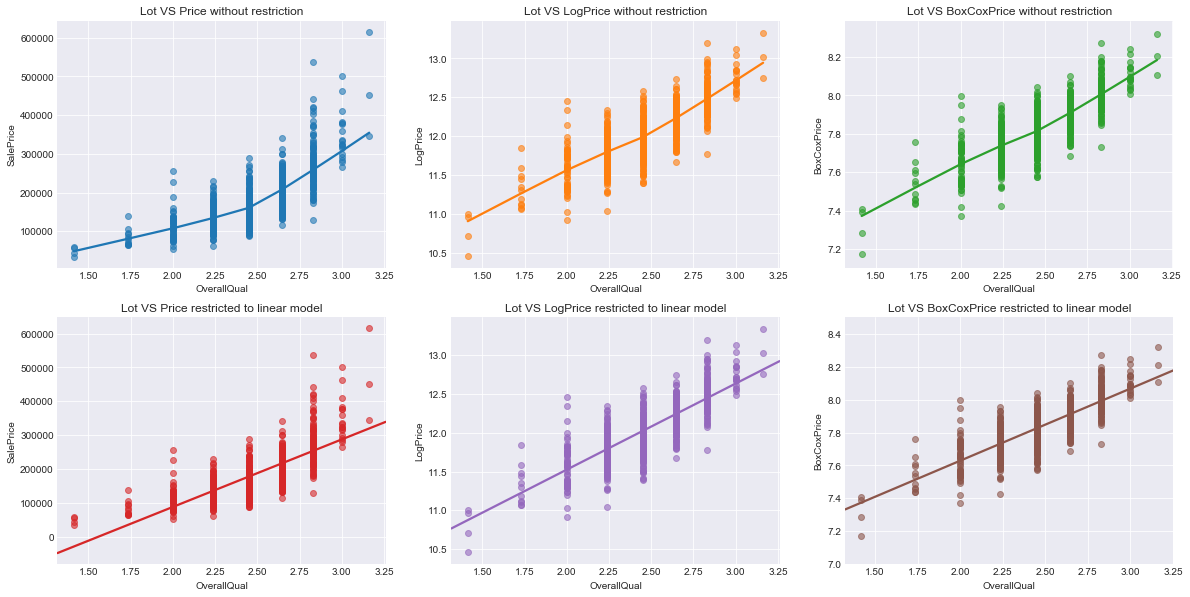

In [572]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['OverallQual-Sq'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='Lot VS Price without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual-Sq'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='Lot VS LogPrice without restriction',xlabel='OverallQual')

sns.regplot(train['OverallQual-Sq'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='Lot VS BoxCoxPrice without restriction',xlabel='OverallQual')


sns.regplot(train['OverallQual-Sq'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='Lot VS Price restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual-Sq'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='Lot VS LogPrice restricted to linear model',xlabel='OverallQual')

sns.regplot(train['OverallQual-Sq'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='Lot VS BoxCoxPrice restricted to linear model',xlabel='OverallQual')
ax[1,2].set_ylim(7,8.5)

plt.show()

### np.sqrt(train["OverallQual"]) can be linear relationship with logprice and boxcoxprice

# GrLivArea

No apparent outliers. 

but There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. 

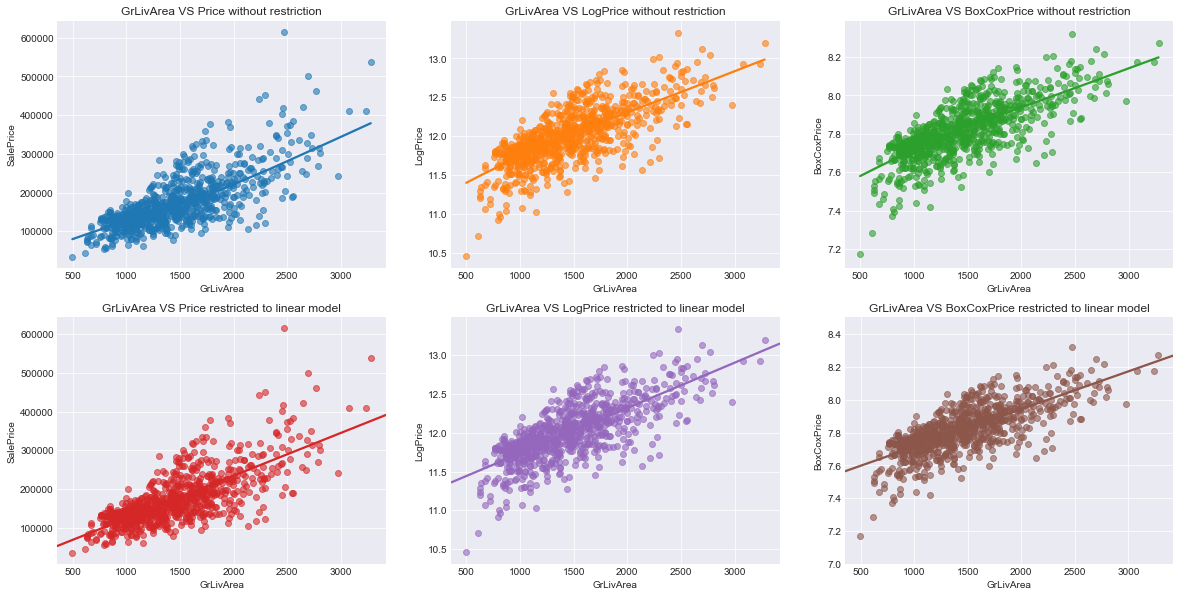

In [573]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='GrLivArea VS Price without restriction',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='GrLivArea VS LogPrice without restriction',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='GrLivArea VS BoxCoxPrice without restriction',xlabel='GrLivArea')


sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='GrLivArea VS Price restricted to linear model',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='GrLivArea VS LogPrice restricted to linear model',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='GrLivArea VS BoxCoxPrice restricted to linear model',xlabel='GrLivArea')
ax[1,2].set_ylim(7,8.5)

plt.show()

### linear relationship !!!  and seems no outlier for logprice and boxcoxprice

# TotalSF

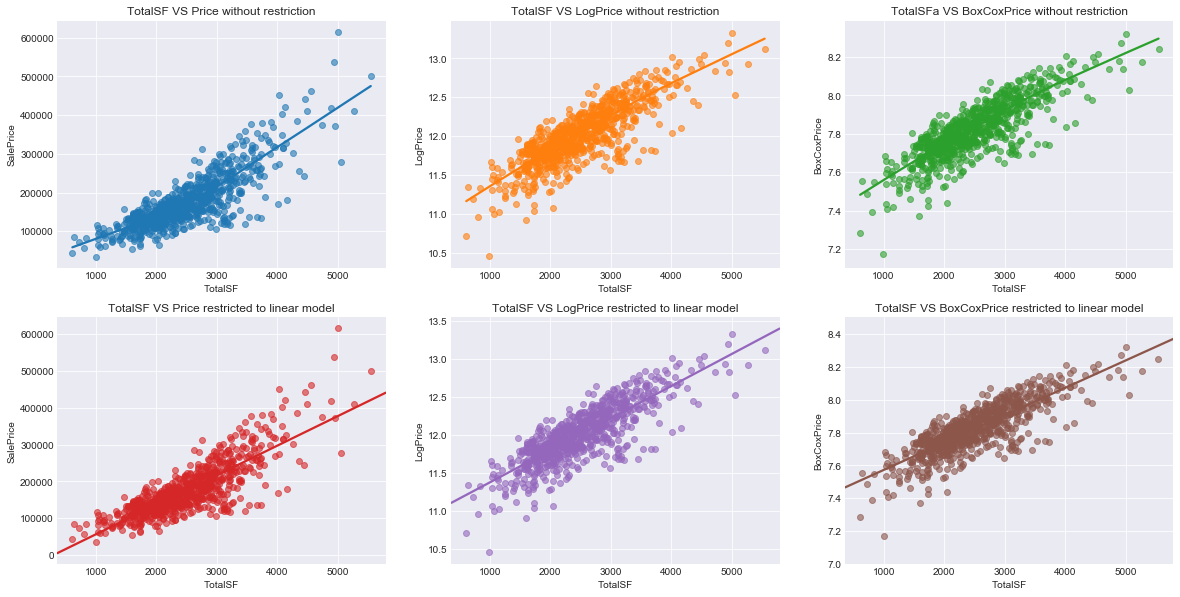

In [574]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['TotalSF'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='TotalSF VS Price without restriction',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='TotalSF VS LogPrice without restriction',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='TotalSFa VS BoxCoxPrice without restriction',xlabel='TotalSF')


sns.regplot(train['TotalSF'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='TotalSF VS Price restricted to linear model',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='TotalSF VS LogPrice restricted to linear model',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='TotalSF VS BoxCoxPrice restricted to linear model',xlabel='TotalSF')
ax[1,2].set_ylim(7,8.5)

plt.show()

# BsmtFinSF1

this predictor has  large coeff in lasso model. so i also check it 

In [575]:
Variables=['BsmtFinSF1','BsmtFinSF2','SalePrice']
table1_3=train[Variables].corr() 
table1_3

,BsmtFinSF1,BsmtFinSF2,SalePrice
BsmtFinSF1,1.000,-0.046,0.464
BsmtFinSF2,-0.046,1.000,0.046
SalePrice,0.464,0.046,1.000


In [576]:
correlation['SalePrice']['BsmtFinSF1']

0.46422538901279586

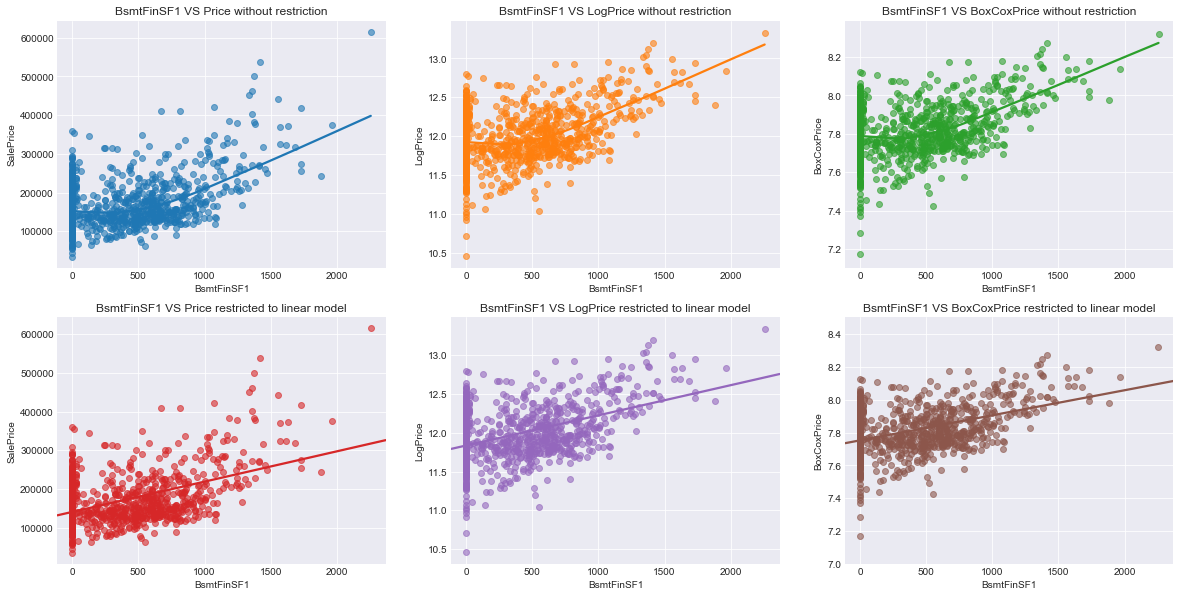

In [577]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['BsmtFinSF1'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='BsmtFinSF1 VS Price without restriction',xlabel='BsmtFinSF1')

sns.regplot(train['BsmtFinSF1'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='BsmtFinSF1 VS LogPrice without restriction',xlabel='BsmtFinSF1')

sns.regplot(train['BsmtFinSF1'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='BsmtFinSF1 VS BoxCoxPrice without restriction',xlabel='BsmtFinSF1')


sns.regplot(train['BsmtFinSF1'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='BsmtFinSF1 VS Price restricted to linear model',xlabel='BsmtFinSF1')

sns.regplot(train['BsmtFinSF1'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='BsmtFinSF1 VS LogPrice restricted to linear model',xlabel='BsmtFinSF1')

sns.regplot(train['BsmtFinSF1'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='BsmtFinSF1 VS BoxCoxPrice restricted to linear model',xlabel='BsmtFinSF1')
ax[1,2].set_ylim(7,8.5)

plt.show()

## linear relationship!  but ...

# GarageArea



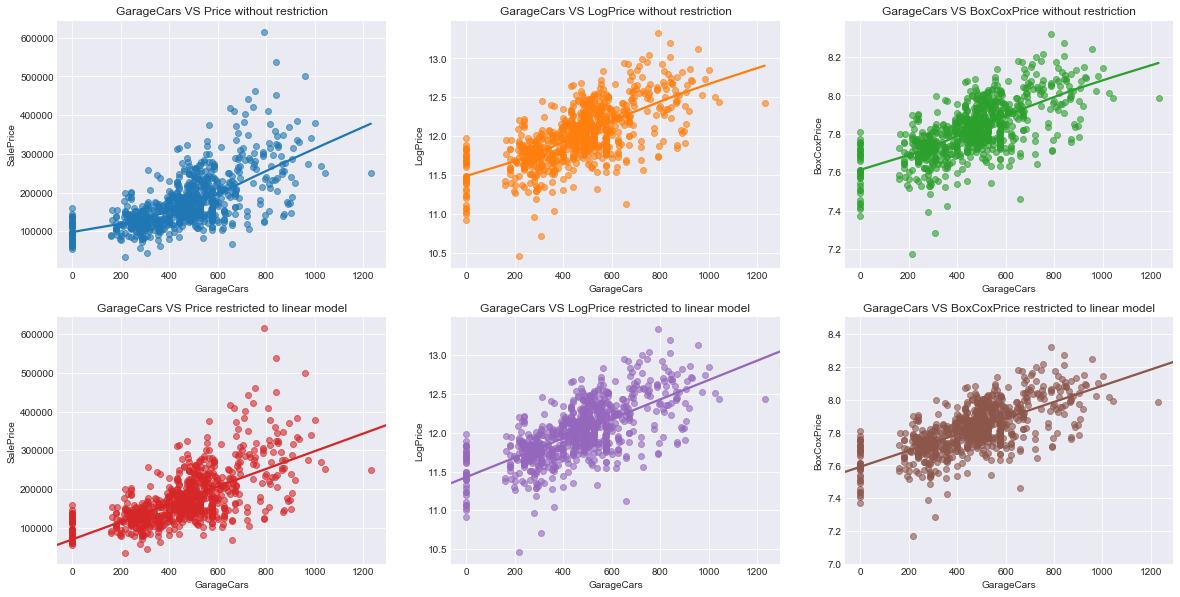

In [580]:
fig, ax= plt.subplots(2,3, figsize=(20,10))

sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='GarageArea VS Price without restriction',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='GarageArea VS LogPrice without restriction',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['BoxCoxPrice'], ax=ax[0,2], ci=True,lowess=True,scatter_kws={'alpha':0.6})
ax[0,2].set(title='GarageArea VS BoxCoxPrice without restriction',xlabel='GarageArea')


sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='GarageArea VS Price restricted to linear model',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='GarageArea VS LogPrice restricted to linear model',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['BoxCoxPrice'], ax=ax[1,2], ci=True,scatter_kws={'alpha':0.6})
ax[1,2].set(title='GarageArea VS BoxCoxPrice restricted to linear model',xlabel='GarageArea')
ax[1,2].set_ylim(7,8.5)

plt.show()

# Interaction

# some categorical features could be ordered numbers??

### i check 24 ordinal variables... sorry that , most of them has non linear relationship . so i made mistake in previoud dataset

# ONLY 'BsmtExposure','LandSlope' has lieanr relationship 

Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Land Slope (Ordinal): Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [530]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')

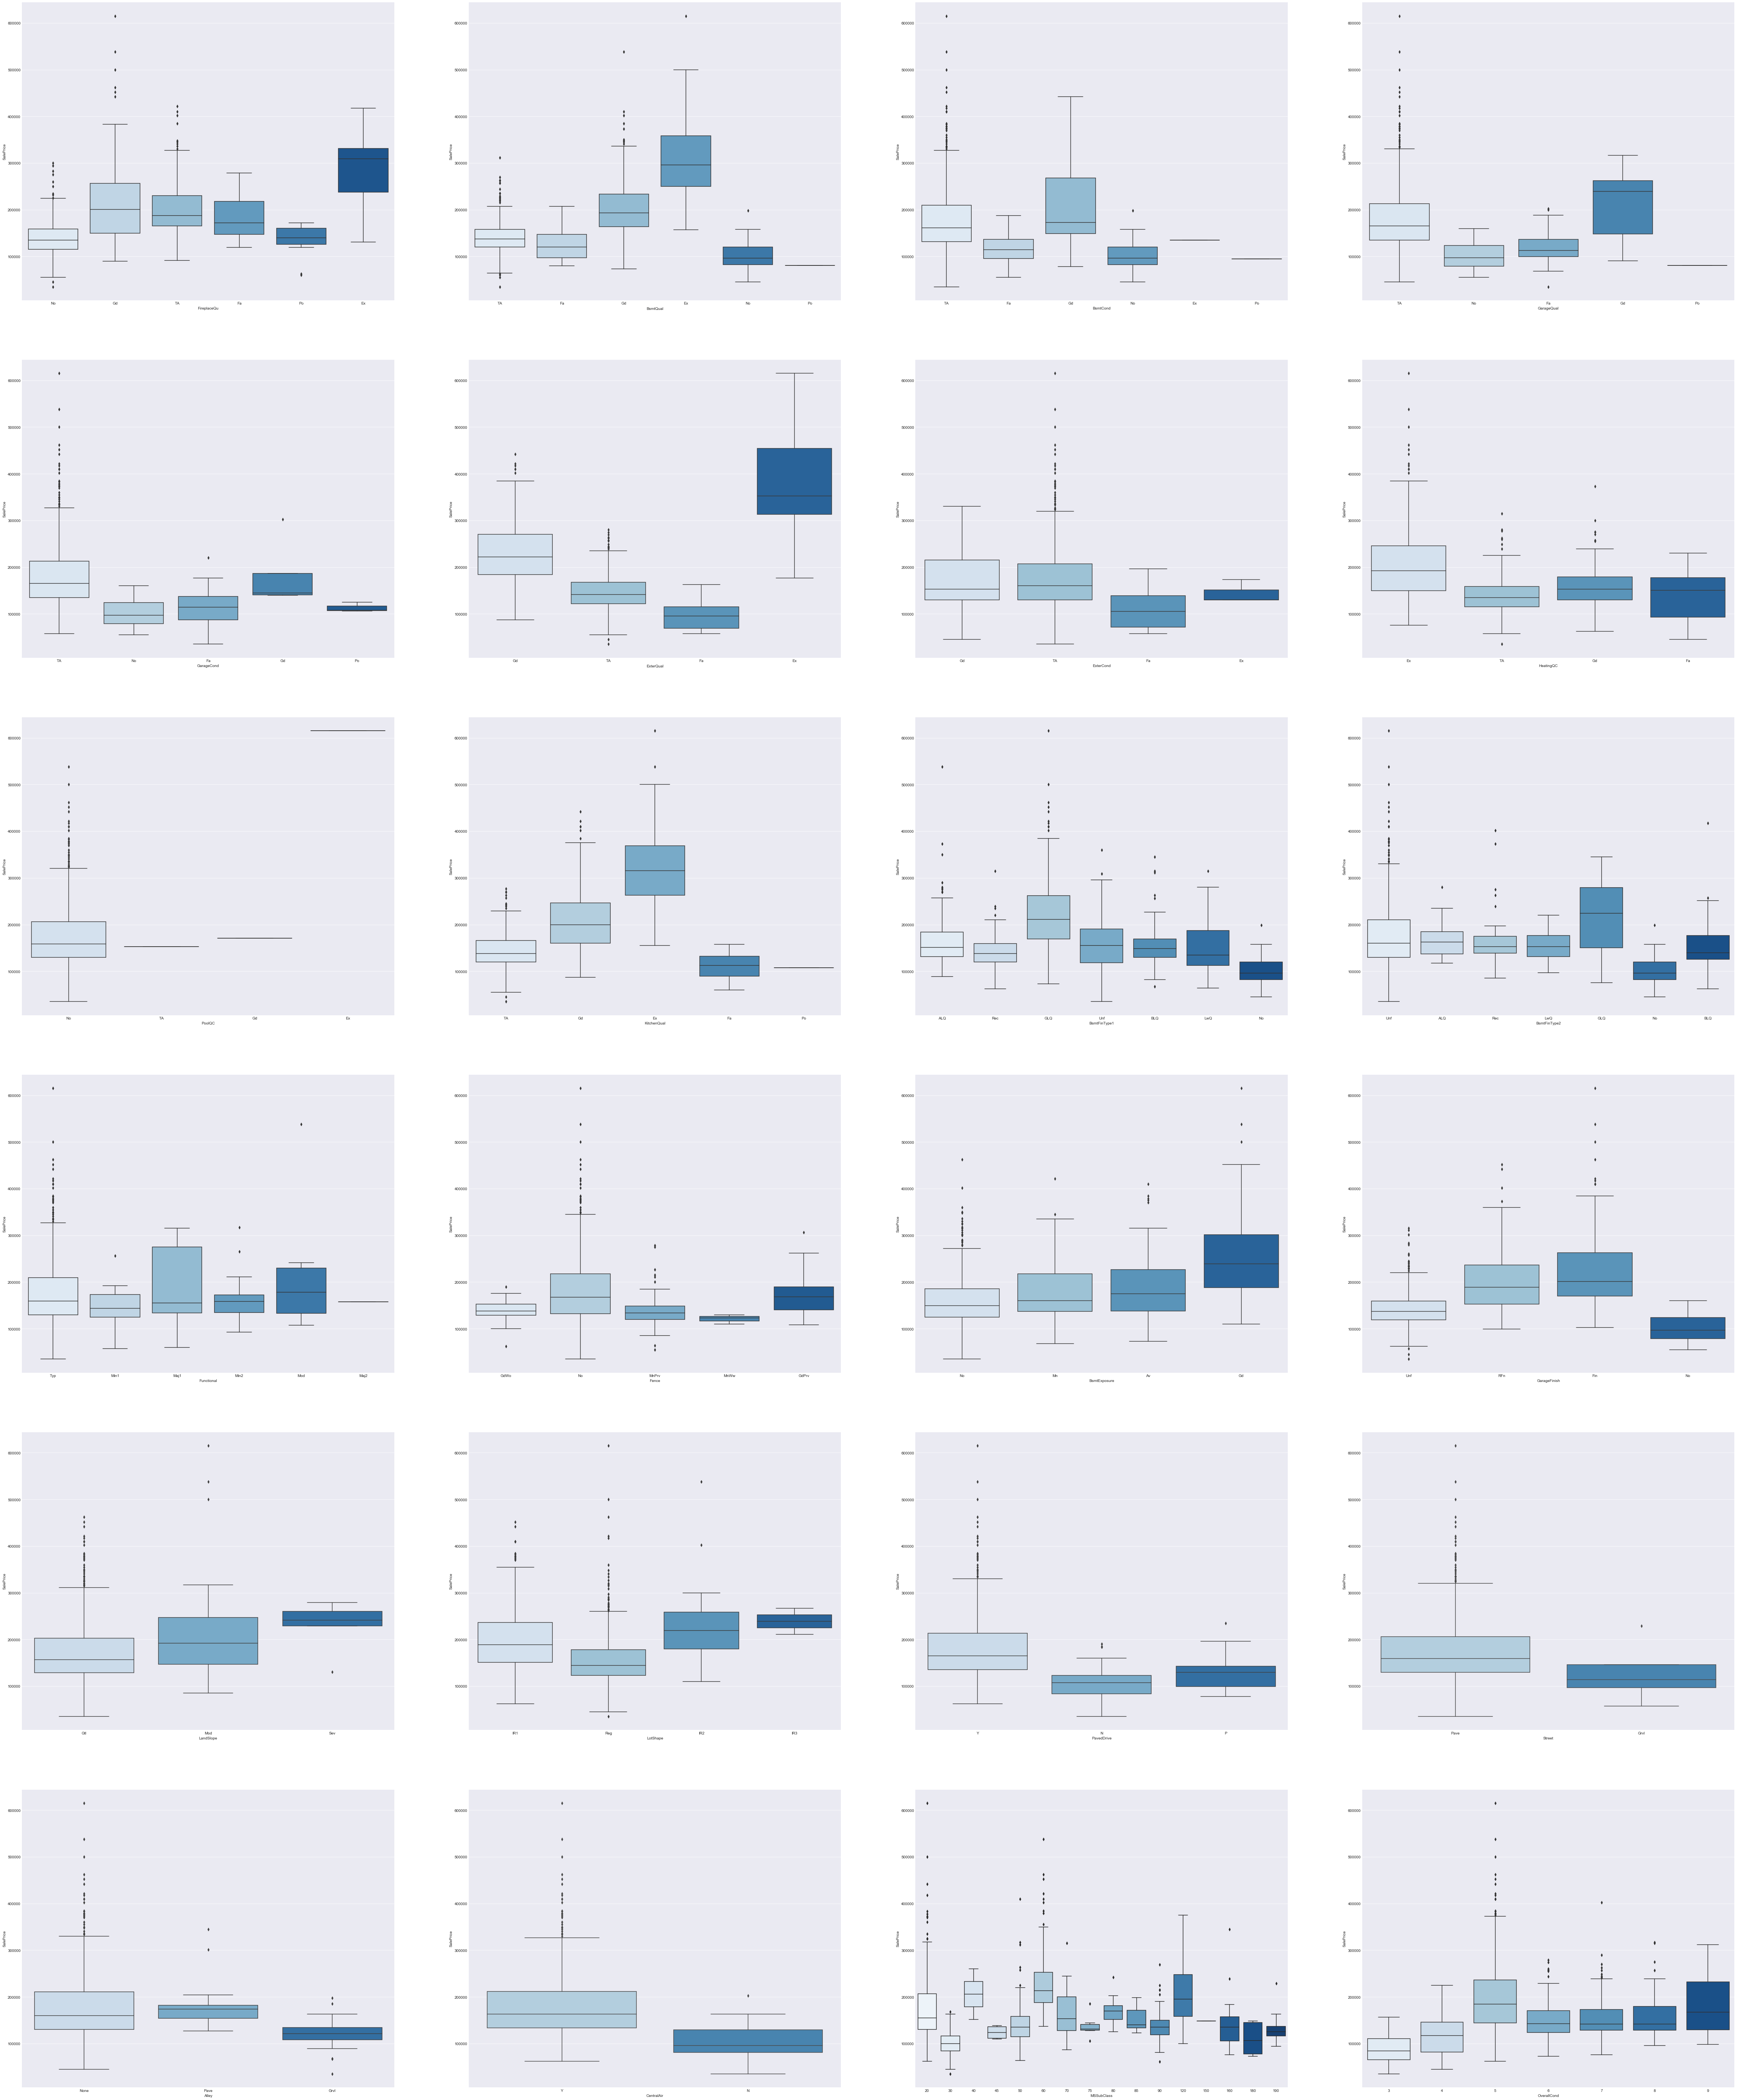

In [531]:
fig, ax= plt.subplots(6,4, figsize=(80,100))
row=0
column=0
for item in cols:
    sns.boxplot(x=item, y='SalePrice', data=train, ax=ax[row,column],palette='Blues')
    column=column+1
    if column==4:
        column=0
        row=row+1
plt.show()
    